# Flowers or Flippers
## Analysis and SVM Species Predictor with the Iris and Penguin Datasets

## 1. Introduction

In this analysis I explore relationships between flower dimension attributes and species in the Iris Dataset, and between bill size, flipper length, sex, and body mass with species in the penguin dataset. I want to find out if SVM can better predict irises or penguins.


## 2. Vizualisations: flowers

In this section I vizualize the distributions of the various attributes of the Iris Dataset, sorted by species. Then I look at the relationships and correlations between those attributes and how they differ between species. Three iris species are analyzed: Iris-setosa, Iris-versicolor, and Iris-virginica; each with the four associated attributes of sepal length, sepal width, petal length, and petal width.

In [1]:
#Import Libraries for Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="dark", color_codes=True)
sns.set_palette("Set2")

import warnings
warnings.filterwarnings('ignore')

#Import Libraries for SVM
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [2]:
#Import the data and view the table and species names
iris = pd.read_csv('Iris.csv')
print(iris.head())

print("Species Include:")
for sp in iris['Species'].unique():
    print(sp)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
Species Include:
Iris-setosa
Iris-versicolor
Iris-virginica


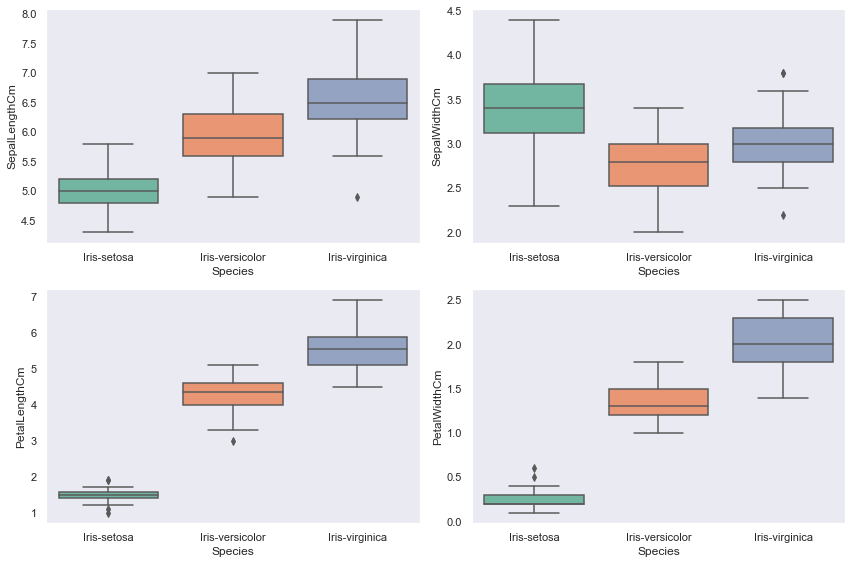

In [3]:
#Plot boxplots for each of the flower attributes separated by species
f, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x="Species", y="SepalLengthCm", data=iris, ax=axs[0,0])
sns.boxplot(x="Species", y="SepalWidthCm", data=iris, ax=axs[0,1])
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=axs[1,0])
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, ax=axs[1,1])

f.tight_layout()
plt.show()

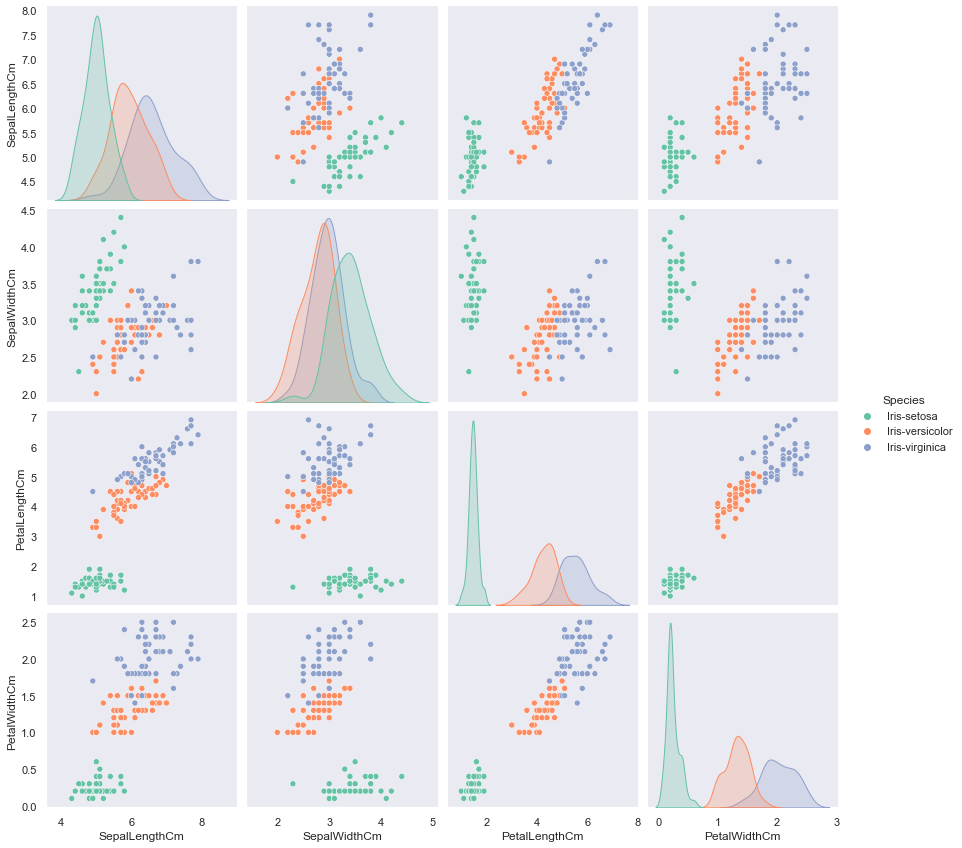

In [4]:
#Pairplot to look at distributions and relationships between attributes
sns.pairplot(iris.drop(["Id"], axis=1), hue="Species", size=3)
plt.show()

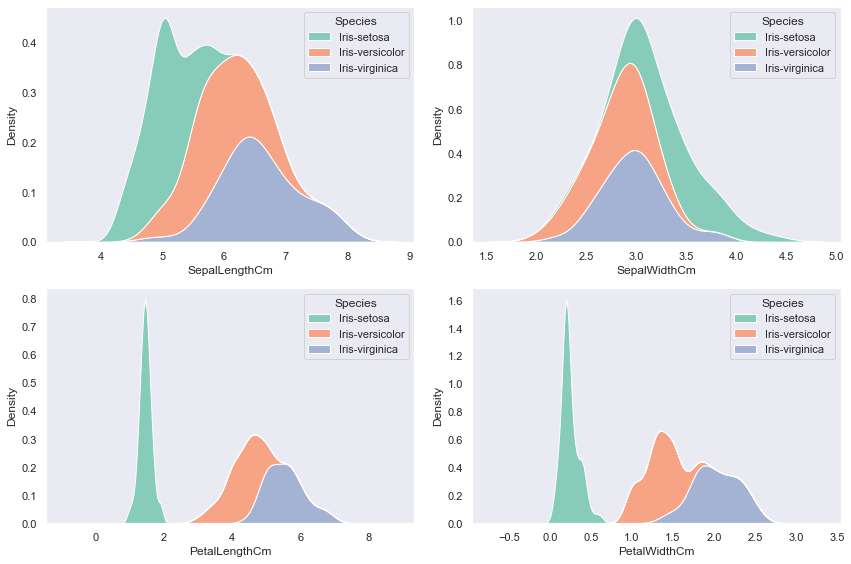

In [5]:
#Plot kde plots for each of the flower attributes separated by species
f, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.kdeplot(hue="Species", x="SepalLengthCm", multiple="stack", data=iris, ax=axs[0,0])
sns.kdeplot(hue="Species", x="SepalWidthCm", multiple="stack", data=iris, ax=axs[0,1])
sns.kdeplot(hue="Species", x="PetalLengthCm", multiple="stack", data=iris, ax=axs[1,0])
sns.kdeplot(hue="Species", x="PetalWidthCm", multiple="stack", data=iris, ax=axs[1,1])

f.tight_layout()
plt.show()

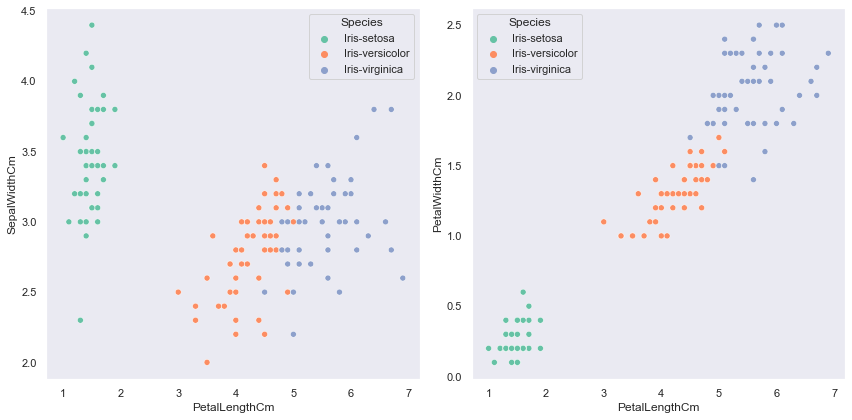

In [6]:
#Enlarged scatterplots
f, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(x="PetalLengthCm", y="SepalWidthCm", hue="Species", data=iris, ax=axs[0])
sns.scatterplot(x="PetalLengthCm", y="PetalWidthCm", hue="Species", data=iris, ax=axs[1])

f.tight_layout()
plt.show()

In [7]:
#View correlation table for all attributes
iris.drop("Id", axis=1).corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


The medians and quartiles in the boxplots are relatively vertically symmetrical, indicating normal distributions for nearly all attributes when separated by species. This is supported by the kde plots in the pairplot, with only the petal width of Iris-serotosa exhibiting a positive skew in both the boxplot and kde. The final kde plot shows the distributions of each attribute with all species combined, providing an interesting insight that the sepal width attribute still exhibits a normal distirbution. Some of the boxplots and scatterplots suggest a few outliers, but these will be retained due to the small size of the dataset.

Of the scatter plots in the pairplot, the petal length vs petal width plot shows the strongest relationship between variables. Because this is low dimensional data, there is no reason to consider removing either of these attributes, especially since there appears to be the best separation between species when looking at this plot. I enlarged this plot as well as petal length vs sepal width to better visualize the separations between species when comparing the respective variables. The correlation table confirms that petal length and petal width are the most strongly correlated variables, while sepal length is also strongly correlated to both variables. Sepal width has only moderate correlations to petal dimensions, and a weak correlation to sepal length. The plot of sepal width vs sepal length also shows the least separation between species.


## 3. SVM Predictor

The Support Vector Machine classifier draws the best hyperplane separating the species according to the attributes of their flowers. In this section I first create a classifier from all four attributes before exploring how lower dimensional SVMs function to predict species.

In [8]:
#Separate data into training and testing sets
train1 = iris.iloc[0:40]
train2 = iris.iloc[50:90]
train3 = iris.iloc[100:140]
train = pd.concat([train1, train2, train3])

test1 = iris.iloc[40:50]
test2 = iris.iloc[90:100]
test3 = iris.iloc[140:150]
test = pd.concat([test1, test2, test3])

In [9]:
#Create SVM species predictor with all four attributes
X_train_4 = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
y_train = train.Species.values

clf = svm.SVC()
clf.fit(X_train_4, y_train)

X_test_4 = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
y_test = test.Species.values

y_pred = clf.predict(X_test_4)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [10]:
#Calculate false positives, false negatives, true positives, true negatives, and f1-score
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 0 False Positives
The classifier produced 0 False Negatives
The classifier produced 30 True Positives
The classifier produced 60 True Negatives
The F1-score for the SVM model is 1.0


In [11]:
#Create SVM species predictorfrom petal length and petal width
X_train_2 = train[['PetalLengthCm', 'PetalWidthCm']].values

clf = svm.SVC()
clf.fit(X_train_2, y_train)

X_test_2 = test[['PetalLengthCm', 'PetalWidthCm']].values

y_pred = clf.predict(X_test_2)

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


In [12]:
#Calculate false positives, false negatives, true positives, true negatives, and f1-score
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 0 False Positives
The classifier produced 0 False Negatives
The classifier produced 30 True Positives
The classifier produced 60 True Negatives
The F1-score for the SVM model is 1.0


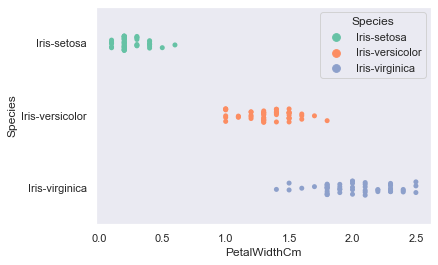

In [13]:
sns.stripplot(data=iris, x="PetalWidthCm", y="Species", hue="Species")
plt.show()

In [14]:
#Create SVM species predictor with all four attributes using entire dataset
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
y = iris.Species.values

clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)
print(cm)

[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]


In [15]:
#Calculate false positives, false negatives, true positives, true negatives, and f1-score
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 4 False Positives
The classifier produced 4 False Negatives
The classifier produced 146 True Positives
The classifier produced 296 True Negatives
The F1-score for the SVM model is 0.9733333333333334


In [16]:
#Create SVM species predictor from petal length and petal width using entire dataset
X = iris[['PetalLengthCm', 'PetalWidthCm']].values
y = iris.Species.values

clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)
print(cm)

[[50  0  0]
 [ 0 48  2]
 [ 0  5 45]]


In [17]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 7 False Positives
The classifier produced 7 False Negatives
The classifier produced 143 True Positives
The classifier produced 293 True Negatives
The F1-score for the SVM model is 0.9533333333333334


In [18]:
#Create SVM species predictor with all four attributes using entire dataset
X = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']].values
y = iris.Species.values

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

clf = svm.SVC()
clf.fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

cm = confusion_matrix(y, y_pred)
print(cm)

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


In [19]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 3 False Positives
The classifier produced 3 False Negatives
The classifier produced 147 True Positives
The classifier produced 297 True Negatives
The F1-score for the SVM model is 0.98


The SVM predicts the test dataset correctly when trained with all four flower attributes, obtaining an F1-score of 1. The same is the case when the model is trained on only two attributes: petal length and petal width. Because of this I plotted a strip plot to observe how 1D data using petal width would likely produce a fairly strong species predictor. However, I am more interested in how the two SVM models might fair in predicting a swath of new iris samples. When labels for the entire dataset are predicted with the model, a difference between the 4D and 2D models arises, with the 4D model producing four false positives and four false negatives for and F1-score of 0.97, while the 2D model produces seven false positives and seven false negatives for an F1-score of 0.95. Both models obtain good results but the 4D SVM is slightly more powerful in predicting iris species. With min-max scaling applied to all four attributes, the model correctly predicts one addtional iris virginica sample, obtaining an F1-score of 0.98.

However, the important question remains: is the SVM better at predicting iris species or penguin species?


## 4. SVM Penguin Predictor

In this section I remove some NaN values from the penguin dataset before exploring which combination of attributes best predict penguin species with a SVM. The Adelie, Chinstrap, and Gentoo species are each associated with six attributes: island (where the penguins are found), bill length in mm, bill depth in mm, flipper length in mm, body mass in g, and sex. In this analysis I ignore island, but all other attributes are considered.

In [20]:
#Import the data and view the table and species names
penguin = sns.load_dataset("penguins")
print(penguin.head())
print("Species Include:")
for sp in penguin['species'].unique():
    print(sp)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
Species Include:
Adelie
Chinstrap
Gentoo


In [21]:
#Remove NaN values
penguin.dropna(inplace=True)
penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [22]:
#Create SVM species predictor with all four attributes using entire dataset
X = penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
y = penguin.species.values

clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)
print(cm)

[[132   0  14]
 [ 63   0   5]
 [  9   0 110]]


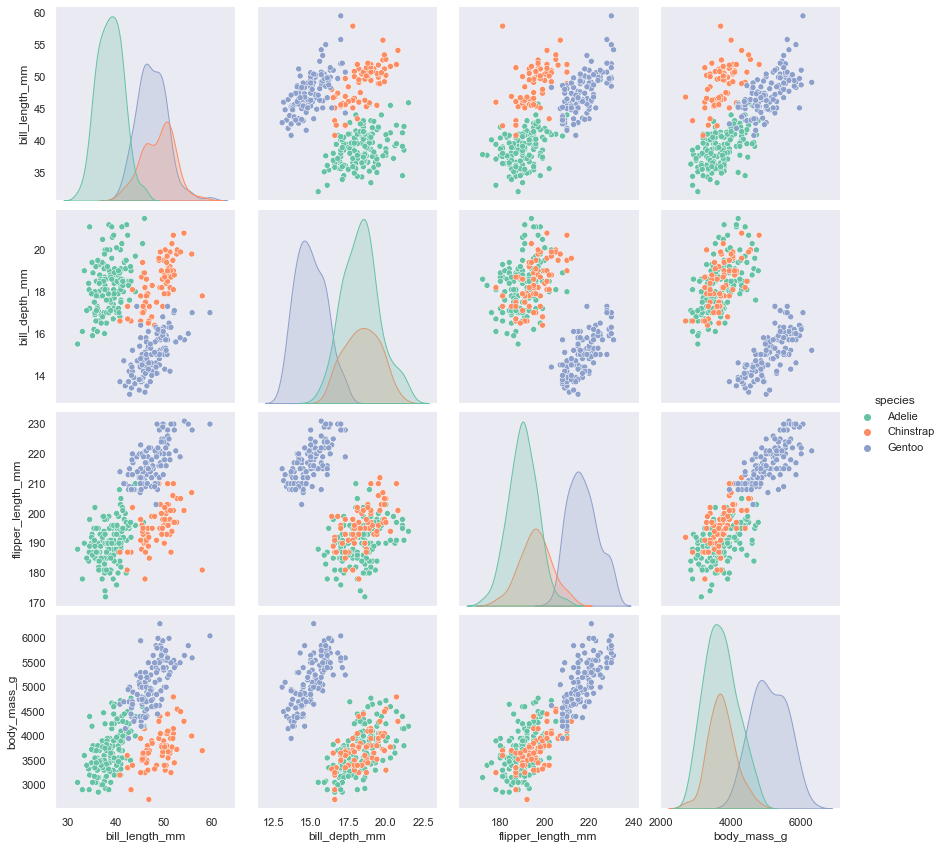

In [23]:
#Pairplot to look at distributions and relationships between attributes
sns.pairplot(penguin, hue="species", size=3)
plt.show()

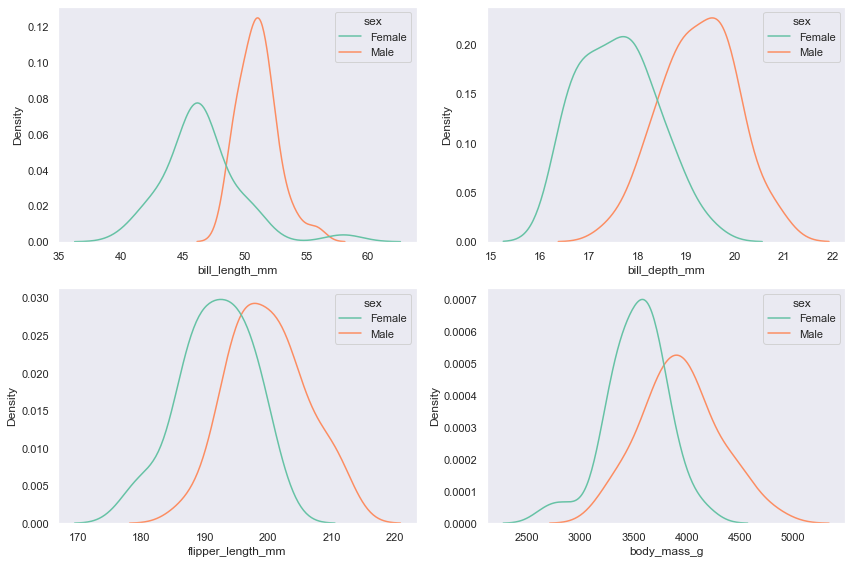

In [24]:
#Plot kde plots for each of the flower attributes separated by species
f, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.kdeplot(hue="sex", x="bill_length_mm", data=penguin[penguin["species"] == "Chinstrap"], ax=axs[0,0])
sns.kdeplot(hue="sex", x="bill_depth_mm", data=penguin[penguin["species"] == "Chinstrap"], ax=axs[0,1])
sns.kdeplot(hue="sex", x="flipper_length_mm", data=penguin[penguin["species"] == "Chinstrap"], ax=axs[1,0])
sns.kdeplot(hue="sex", x="body_mass_g", data=penguin[penguin["species"] == "Chinstrap"], ax=axs[1,1])

f.tight_layout()
plt.show()

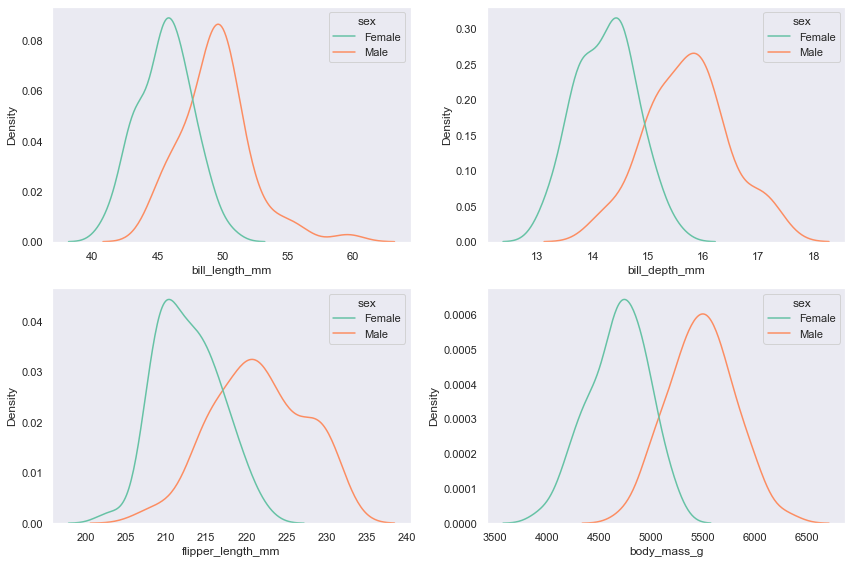

In [25]:
#Plot kde plots for each of the flower attributes separated by species
f, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.kdeplot(hue="sex", x="bill_length_mm", data=penguin[penguin["species"] == "Gentoo"], ax=axs[0,0])
sns.kdeplot(hue="sex", x="bill_depth_mm", data=penguin[penguin["species"] == "Gentoo"], ax=axs[0,1])
sns.kdeplot(hue="sex", x="flipper_length_mm", data=penguin[penguin["species"] == "Gentoo"], ax=axs[1,0])
sns.kdeplot(hue="sex", x="body_mass_g", data=penguin[penguin["species"] == "Gentoo"], ax=axs[1,1])

f.tight_layout()
plt.show()

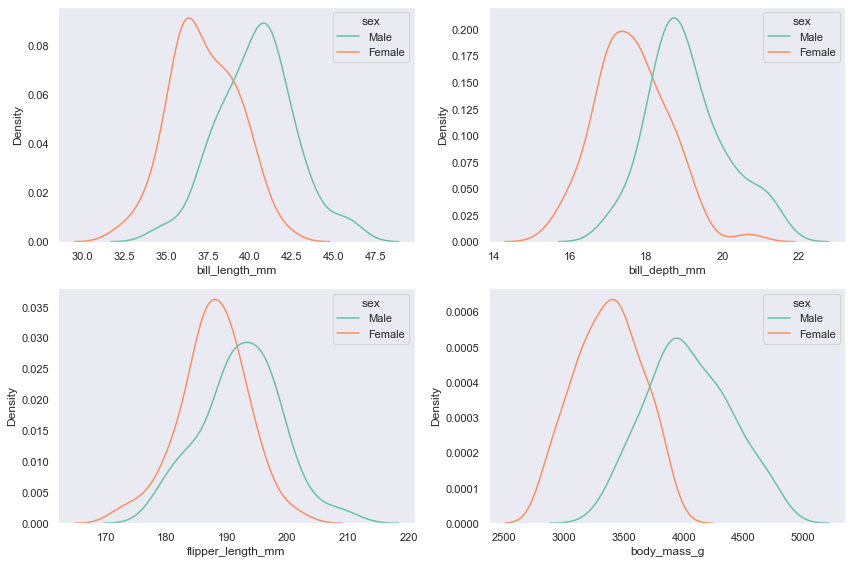

In [26]:
#Plot kde plots for each of the flower attributes separated by species
f, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.kdeplot(hue="sex", x="bill_length_mm", data=penguin[penguin["species"] == "Adelie"], ax=axs[0,0])
sns.kdeplot(hue="sex", x="bill_depth_mm", data=penguin[penguin["species"] == "Adelie"], ax=axs[0,1])
sns.kdeplot(hue="sex", x="flipper_length_mm", data=penguin[penguin["species"] == "Adelie"], ax=axs[1,0])
sns.kdeplot(hue="sex", x="body_mass_g", data=penguin[penguin["species"] == "Adelie"], ax=axs[1,1])

f.tight_layout()
plt.show()

In [27]:
#Add a numercial column for penguin sex
def sex(bird):
    if bird.sex == 'Male':
        return 0
    else:
        return 1

penguin = penguin.assign(sex_0_1 = penguin.apply(sex, axis=1))

In [28]:
#Create SVM species predictor with all five attributes using entire dataset
X = penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_0_1']].values
y = penguin.species.values

clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)
print(cm)

[[135   0  11]
 [ 64   0   4]
 [  9   0 110]]


In [29]:
#View correlation table for all attributes
penguin.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_0_1
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,-0.344078
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.372673
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,-0.255169
body_mass_g,0.589451,-0.472016,0.872979,1.000000,-0.424987
sex_0_1,-0.344078,-0.372673,-0.255169,-0.424987,1.000000


In [30]:
#Create SVM species predictor with least correlated attributes attributes using entire dataset
X = penguin[['bill_length_mm', 'bill_depth_mm']].values
y = penguin.species.values

clf = svm.SVC()
clf.fit(X, y)

y_pred = clf.predict(X)

cm = confusion_matrix(y, y_pred)
print(cm)

[[143   3   0]
 [  6  56   6]
 [  0   1 118]]


In [31]:
#Calculate fale positive, false negatives, true positives, true negatives and an F1-score
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 16 False Positives
The classifier produced 16 False Negatives
The classifier produced 317 True Positives
The classifier produced 650 True Negatives
The F1-score for the SVM model is 0.9519519519519519


In [32]:
#Create SVM species predictor with normalized bill length and depth
X = penguin[['bill_length_mm', 'bill_depth_mm']].values
y = penguin.species.values

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

clf = svm.SVC()
clf.fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

cm = confusion_matrix(y, y_pred)
print(cm)

[[144   2   0]
 [  5  60   3]
 [  0   3 116]]


In [33]:
#Calculate fale positive, false negatives, true positives, true negatives and an F1-score
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 13 False Positives
The classifier produced 13 False Negatives
The classifier produced 320 True Positives
The classifier produced 653 True Negatives
The F1-score for the SVM model is 0.960960960960961


After removing the NaN values from the data and training the SVM with all of the numerical attributes, the model correctly predicted the majority of samples for two of the species, but correctly identified none of the Chinstrap penguins. Observing the pairplot, I noticed first that flipper length was strongly correlated with bodymass and second, that there was a bimodal distribution in the KDE plot for Chinstrap bill length. Assuming the latter was due to sex differences, I replotted all of the KDE plots with male and female penguins separated and found that males were, on average, larger for all metrics. I decided to add a binary numerical attribute for sex and re-train the model, but this only slightly improved the results and the SVM still predicted zero Chinstrap penguins.

The correlation table showed that bill depth and length had the lowest correlation among the attributes. Training the model on just these two attributes resulted in much better separation of the species, and achieved an F1-score of 0.95, and after normalizing, this increased to 0.96. Unfortunately, the penguin data could not compete with the iris data in terms of precision and recall when predicted with SVM... Unless... we look back at the original table and realize that the values for flipper length and bodymass are orders of magnitude larger than bill length and depth, and perhaps if all five of the considered attributes underwent min-max normalization, the SVM could predict species much more effectively??? The results are below.

In [34]:
#Create SVM species predictor with all attributes normalized
X = penguin[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex_0_1']].values

min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)

clf = svm.SVC()
clf.fit(X_scaled, y)

y_pred = clf.predict(X_scaled)

cm = confusion_matrix(y, y_pred)
print(cm)

[[146   0   0]
 [  4  64   0]
 [  0   0 119]]


In [35]:
#Calculate fale positive, false negatives, true positives, true negatives and an F1-score
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

print(f"The classifier produced {sum(FP)} False Positives")
print(f"The classifier produced {sum(FN)} False Negatives")
print(f"The classifier produced {sum(TP)} True Positives")
print(f"The classifier produced {sum(TN)} True Negatives")
print(f"The F1-score for the SVM model is {sum(TP)/(sum(TP)+(sum(FP)+sum(FN))/2)}")

The classifier produced 4 False Positives
The classifier produced 4 False Negatives
The classifier produced 329 True Positives
The classifier produced 662 True Negatives
The F1-score for the SVM model is 0.987987987987988


In the end, Penguins edge out Irises by less than 1% in terms of F1-Score. I never doubted you Penguins.